In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json
import collections

In [10]:
url = "https://crashviewer.nhtsa.dot.gov/CrashAPI/analytics/GetInjurySeverityCounts?"

#fromCaseYear=2014&toCaseYear=2015&state=1&county=&format=js
#fromCaseYear=2014&toCaseYear=2015&state=1&format=json
FromYear = "2005"
ToYear = "2018"
State = "6"
#
query_url = url + "fromCaseYear=" + FromYear + "&toCaseYear=" + ToYear + "&state=" + State + "&county=&format=json"
response = requests.get(query_url).json()
print(query_url)

https://crashviewer.nhtsa.dot.gov/CrashAPI/analytics/GetInjurySeverityCounts?fromCaseYear=2005&toCaseYear=2018&state=6&county=&format=json


In [11]:
pprint(response)

{'Count': 9,
 'Message': 'Results returned successfully',
 'Results': [[{'CaseYear': '2010',
               'CrashCounts': 2504,
               'TotalFatalCounts': 2720},
              {'CaseYear': '2011',
               'CrashCounts': 2617,
               'TotalFatalCounts': 2816},
              {'CaseYear': '2012',
               'CrashCounts': 2733,
               'TotalFatalCounts': 2966},
              {'CaseYear': '2013',
               'CrashCounts': 2860,
               'TotalFatalCounts': 3107},
              {'CaseYear': '2014',
               'CrashCounts': 2859,
               'TotalFatalCounts': 3102},
              {'CaseYear': '2015',
               'CrashCounts': 3123,
               'TotalFatalCounts': 3387},
              {'CaseYear': '2016',
               'CrashCounts': 3540,
               'TotalFatalCounts': 3837},
              {'CaseYear': '2017',
               'CrashCounts': 3569,
               'TotalFatalCounts': 3884},
              {'CaseYear': '2018',
   

In [4]:


#FromYear = "2008"
#ToYear = "2015"
#State = "48"
#query_url = url + "fromCaseYear=" + FromYear + "&toCaseYear=" + ToYear + "&state=" + State + "&county=" + "&format=json"

In [12]:
results = (response["Results"][0])
Results = pd.DataFrame(results, columns =['CaseYear', 'CrashCounts', 'TotalFatalCounts'])
Results

,CaseYear,CrashCounts,TotalFatalCounts
0,2010,2504,2720
1,2011,2617,2816
2,2012,2733,2966
3,2013,2860,3107
4,2014,2859,3102
5,2015,3123,3387
6,2016,3540,3837
7,2017,3569,3884
8,2018,3259,3563


In [13]:
states = {"6","8","12","17","36","39","42","48"}
FromYear = "2008"
ToYear = "2018"
Results2 = []
for State in states:
    query_url = url + "fromCaseYear=" + FromYear + "&toCaseYear=" + ToYear + "&state=" + State + "&county=" + "&format=json"
    response = requests.get(query_url).json()
    Results2.append(response["Results"][0])
#pprint(Results2)


In [14]:
California = Results2[0]
Colorado = Results2[1]
Florida = Results2[2]
Illinois = Results2[3]
New_York = Results2[4]
Ohio = Results2[5]
Pennsylvania = Results2[6]
Texas = Results2[7]

texas_df = pd.DataFrame(Texas)
texas_df
cali_df = pd.DataFrame(California)
colo_df = pd.DataFrame(Colorado)
flor_df = pd.DataFrame(Florida)
illi_df = pd.DataFrame(Illinois)
NY_df = pd.DataFrame(New_York)
ohio_df = pd.DataFrame(Ohio)
penn_df = pd.DataFrame(Pennsylvania)
tex_df = pd.DataFrame(Texas)

cali_df['State'] = "California"
colo_df['State'] = "Colorado"
flor_df['State'] = "Florida"
illi_df['State'] = "Illinois"
NY_df['State'] = "New York"
ohio_df['State'] = "Ohio"
penn_df['State'] = "Pennsyvlania"
tex_df['State'] = "Texas"

tex_df
merged = cali_df.merge(flor_df, left_on=['State','CaseYear','CrashCounts','TotalFatalCounts'], right_on=['State','CaseYear','CrashCounts','TotalFatalCounts'],how="outer")
merged = merged.merge(illi_df, left_on=['State','CaseYear','CrashCounts','TotalFatalCounts'], right_on=['State','CaseYear','CrashCounts','TotalFatalCounts'],how="outer")
merged = merged.merge(NY_df, left_on=['State','CaseYear','CrashCounts','TotalFatalCounts'], right_on=['State','CaseYear','CrashCounts','TotalFatalCounts'],how="outer")
merged = merged.merge(ohio_df, left_on=['State','CaseYear','CrashCounts','TotalFatalCounts'], right_on=['State','CaseYear','CrashCounts','TotalFatalCounts'],how="outer")
merged = merged.merge(penn_df, left_on=['State','CaseYear','CrashCounts','TotalFatalCounts'], right_on=['State','CaseYear','CrashCounts','TotalFatalCounts'],how="outer")
merged = merged.merge(tex_df, left_on=['State','CaseYear','CrashCounts','TotalFatalCounts'], right_on=['State','CaseYear','CrashCounts','TotalFatalCounts'],how="outer")
merged = merged.merge(colo_df, left_on=['State','CaseYear','CrashCounts','TotalFatalCounts'], right_on=['State','CaseYear','CrashCounts','TotalFatalCounts'],how="outer")

merged.head(20)

,CaseYear,CrashCounts,TotalFatalCounts,State
0,2010,1128,1201,California
1,2011,1093,1171,California
2,2012,1096,1180,California
3,2013,1124,1202,California
4,2014,980,1041,California
5,2015,1061,1136,California
6,2016,981,1041,California
7,2017,939,1006,California
8,2018,889,943,California
9,2010,411,450,Florida


In [15]:
merged['TotalFatalCounts'] = merged['TotalFatalCounts'].astype(int)

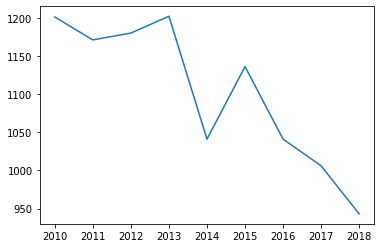

In [18]:
x_axis = merged.loc[merged["State"] == "California"]["CaseYear"]
y_axis = merged.loc[merged["State"] == "California"]["TotalFatalCounts"]
plt.plot(x_axis, y_axis)
plt.show()
#for state in merged:

#for state in merged:
#x_axis = merged["State"]    
#x_axis

In [ ]:
result = collections.defaultdict(list)

dol = collections.defaultdict(list)
for d in Texas:
   #k = d["CaseYear"]
   dol[k].append(d)

print(dol)